In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

import import_ipynb
from function_for_eda import *

importing Jupyter notebook from function_for_eda.ipynb


# Read Dataset

In [2]:
credit_card = pd.read_csv(r'C:\Users\ci\OneDrive - National Economics University\Study NEU\Visual\Final Project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_credit_card_balance.csv', sep=',')
application_train = pd.read_csv(r'C:\Users\ci\OneDrive - National Economics University\Study NEU\Visual\Final Project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv')

In [3]:
print_basic_information(credit_card, 'Credit card balance', ['SK_ID_PREV', 'SK_ID_CURR'])

The shape of Credit card balance is: (3227965, 23)
----------------------------------------------------------------------------------------------------
Number of duplicate values in Credit card balance: 0
----------------------------------------------------------------------------------------------------
Number of unique SK_ID_PREV in Credit card balance are: 87452
Number of unique SK_ID_CURR in Credit card balance are: 86905


In [4]:
get_column_names_by_type(credit_card)

{'int64': ['SK_ID_PREV',
  'MONTHS_BALANCE',
  'AMT_CREDIT_LIMIT_ACTUAL',
  'CNT_DRAWINGS_CURRENT',
  'SK_DPD',
  'SK_DPD_DEF',
  'SK_ID_CURR'],
 'float64': ['AMT_BALANCE',
  'AMT_DRAWINGS_ATM_CURRENT',
  'AMT_DRAWINGS_CURRENT',
  'AMT_DRAWINGS_OTHER_CURRENT',
  'AMT_DRAWINGS_POS_CURRENT',
  'AMT_INST_MIN_REGULARITY',
  'AMT_PAYMENT_CURRENT',
  'AMT_PAYMENT_TOTAL_CURRENT',
  'AMT_RECEIVABLE_PRINCIPAL',
  'AMT_RECIVABLE',
  'AMT_TOTAL_RECEIVABLE',
  'CNT_DRAWINGS_ATM_CURRENT',
  'CNT_DRAWINGS_OTHER_CURRENT',
  'CNT_DRAWINGS_POS_CURRENT',
  'CNT_INSTALMENT_MATURE_CUM'],
 'object': ['NAME_CONTRACT_STATUS']}

File POS_CASH_balance.csv có 23 features. Trong đó có 2 features là SK_ID_PREV và SK_ID_CURR để chỉ ID cho các khoản vay của khách hàng.

- SK_ID_PREV là ID của khoản vay trước trong Home Credit liên quan đến khoản vay trong mẫu của chúng tôi. (Một khoản vay trong mẫu của chúng tôi có thể có 0,1,2 hoặc nhiều khoản vay trước trong Home Credit).
- SK_ID_CURR là ID cho khoản vay hiện tại của khách hàng với Home Credit.

21 features còn lại mô tả thống kê cho số dư hàng tháng của các khoản vay thẻ tín dụng của khách hàng tại Home Credit tương ứng với các ID.

### Features Understanding
- <b>SK_ID_PREV:</b> ID of  previous credit related to loan in sample
- <b>SK_ID_CURR:</b> ID of (previous) loan in sample
- <b>MONTHS_BALANCE:</b> Month of balance during the month of previous credit
- <b>AMT_BALANCE:</b> Balance during the month of the previous credit
- <b>AMT_CREDIT_LIMIT_ACTUAL:</b> Credit card limit during the month of the previous application
- <b>AMT_DRAWINGS_ATM_CURRENT:</b> Amount drawing at ATM during the month of the previous credit
- <b>AMT_DRAWINGS_CURRENT:</b> Amount drawing during the month of the previous credit
- <b>AMT_DRAWINGS_OTHER_CURRENT:</b> Amount of other drawings during the month of the previous credit
- <b>AMT_DRAWINGS_POS_CURRENT:</b> Amount drawing or buying goods during the month of the previous credit
- <b>AMT_INST_MIN_REGULARITY:</b> Minimal installment for this month of the previous credit
- <b>AMT_PAYMENT_CURRENT:</b> The amount of money that the client pay during the month on the previous credit
- <b>AMT_PAYMENT_TOTAL_CURRENT:</b> The amount of money that the client pay during the month in total on the previous credit
- <b>AMT_RECEIVABLE_PRINCIPAL:</b> Amount receivable for principal on the previous credit
- <b>AMT_RECIVABLE:</b> Amount receivable on the previous credit
- <b>AMT_TOTAL_RECEIVABLE:</b> Total amount receivable on the previous credit
- <b>CNT_DRAWINGS_ATM_CURRENT:</b> Number of drawings at ATM during this month on the previous credit
- <b>CNT_DRAWINGS_CURRENT:</b> Number of drawings during this month on the previous credit
- <b>CNT_DRAWINGS_OTHER_CURRENT:</b> Number of other drawings during this month on the previous credit
- <b>CNT_DRAWINGS_POS_CURRENT:</b> Number of other drawings for goods during this month on the previous credit
- <b>CNT_INSTALMENT_MATURE_CUM:</b> Number of paid installments on the previous credit
- <b>NAME_CONTRACT_STATUS:</b> Contract status on the previous credit (7 values: active signed,...)
- <b>SK_DPD:</b> Day past due during the month on the previous credit
- <b>SK_DPD_DEF:</b> Day past due during the month with tolerance (debts with low loan amounts are ignored) of the previous credit

# Missing Values

In [5]:
count_missing_values(credit_card)

Your data frame has 23 columns.
There are 9 columns that have missing values.


,total_nan,percent_nan
AMT_PAYMENT_CURRENT,620093,19.210029
AMT_DRAWINGS_ATM_CURRENT,605754,18.765817
AMT_DRAWINGS_OTHER_CURRENT,605754,18.765817
AMT_DRAWINGS_POS_CURRENT,605754,18.765817
CNT_DRAWINGS_ATM_CURRENT,605754,18.765817
CNT_DRAWINGS_OTHER_CURRENT,605754,18.765817
CNT_DRAWINGS_POS_CURRENT,605754,18.765817
AMT_INST_MIN_REGULARITY,264384,8.190423
CNT_INSTALMENT_MATURE_CUM,264384,8.190423


Có 9/23 features có chứa giá trị NaN, tỉ lệ missing nằm trong khoảng 8-20%

##### Merge with Target column to get more insight

In [6]:
credit_card_merged = pd.merge(application_train[["SK_ID_CURR", "TARGET"]], credit_card, how='left', on=['SK_ID_CURR'])
credit_card_merged.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,278621,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,139008,0,1489396.0,-2.0,0.0,270000.0,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,Active,0.0,0.0
2,139008,0,1489396.0,-1.0,0.0,270000.0,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,Active,0.0,0.0
3,139008,0,1489396.0,-5.0,0.0,270000.0,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,Active,0.0,0.0
4,139008,0,1489396.0,-3.0,0.0,270000.0,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,Active,0.0,0.0


## Categorical Features

Total Number of unique categories of NAME_CONTRACT_STATUS = 8


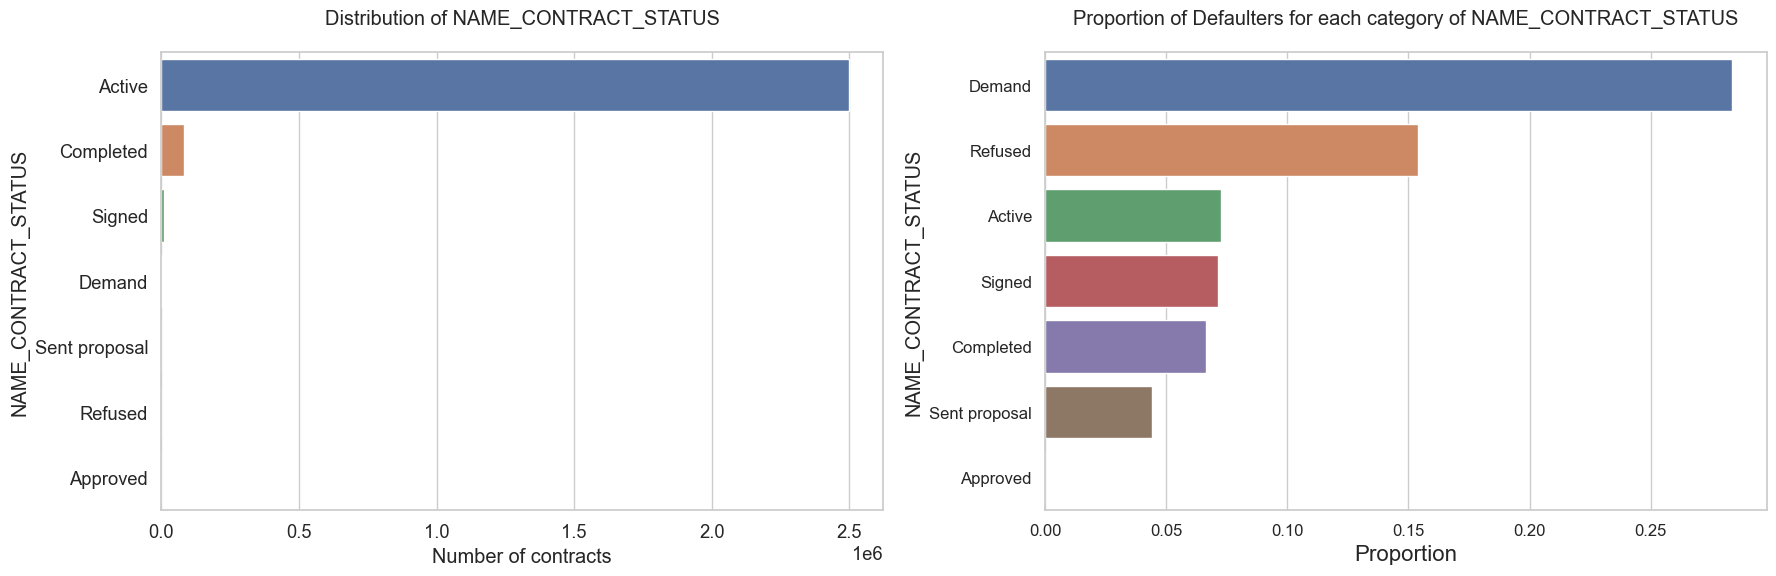

In [7]:
plot_categorical_variables(credit_card_merged, 'NAME_CONTRACT_STATUS')

##### NAME_CONTRACT_STATUS
- Gần như tất cả các hợp đồng đều ở trạng thái Active. 
- Tuy nhiên, tỉ lệ nợ xấu của các hợp đồng Demand và Refused lại cao hơn khá nhiều so với các hợp đồng ở trạng thái khác.

## Numerical Features

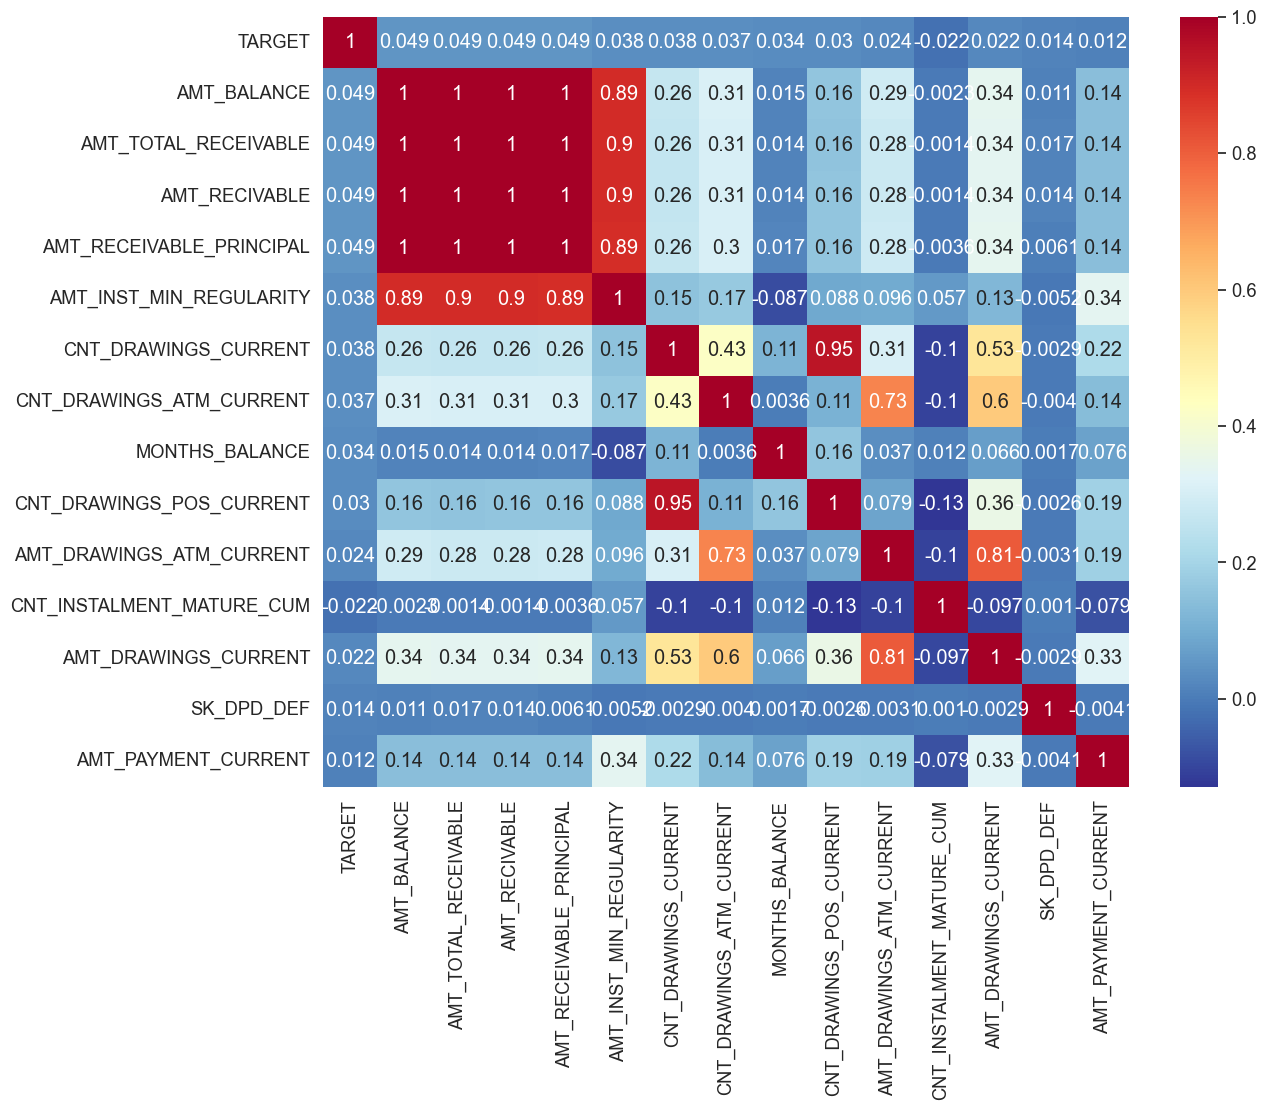

In [8]:
correlation_matrix(credit_card_merged, 15, numerical = True)

1. Heatmap trên cho biết mức độ tương quan giữa 1 số features (có mức độ tương quan cao nhất với biến Target) với nhau.
2. Từ heatmap trên, ta có thể thấy dữ liệu bao gồm 1 số nhóm features có mức độ tương quan với nhau từ cao đến rất cao:
- 'CNT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT'
- 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT'
- 'AMT_BALANCE', 'AMT_TOTAL_RECEIVABLE', 'AMT_RECEIVABLE', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_INST_MIN_REGULAR'
- ...
=> Mức độ tương quan giữa các nhóm feature này với nhau cũng khá cao

=> Có thể xem xét tạo ra một số features mới bằng cách thực hiện cách toán tử giữa các features

3. Mức độ tương quan của các đặc điểm với biến TARGET không đáng kể, điều này cho thấy sự vắng mặt của mối quan hệ tuyến tính giữa features và biến TARGET.

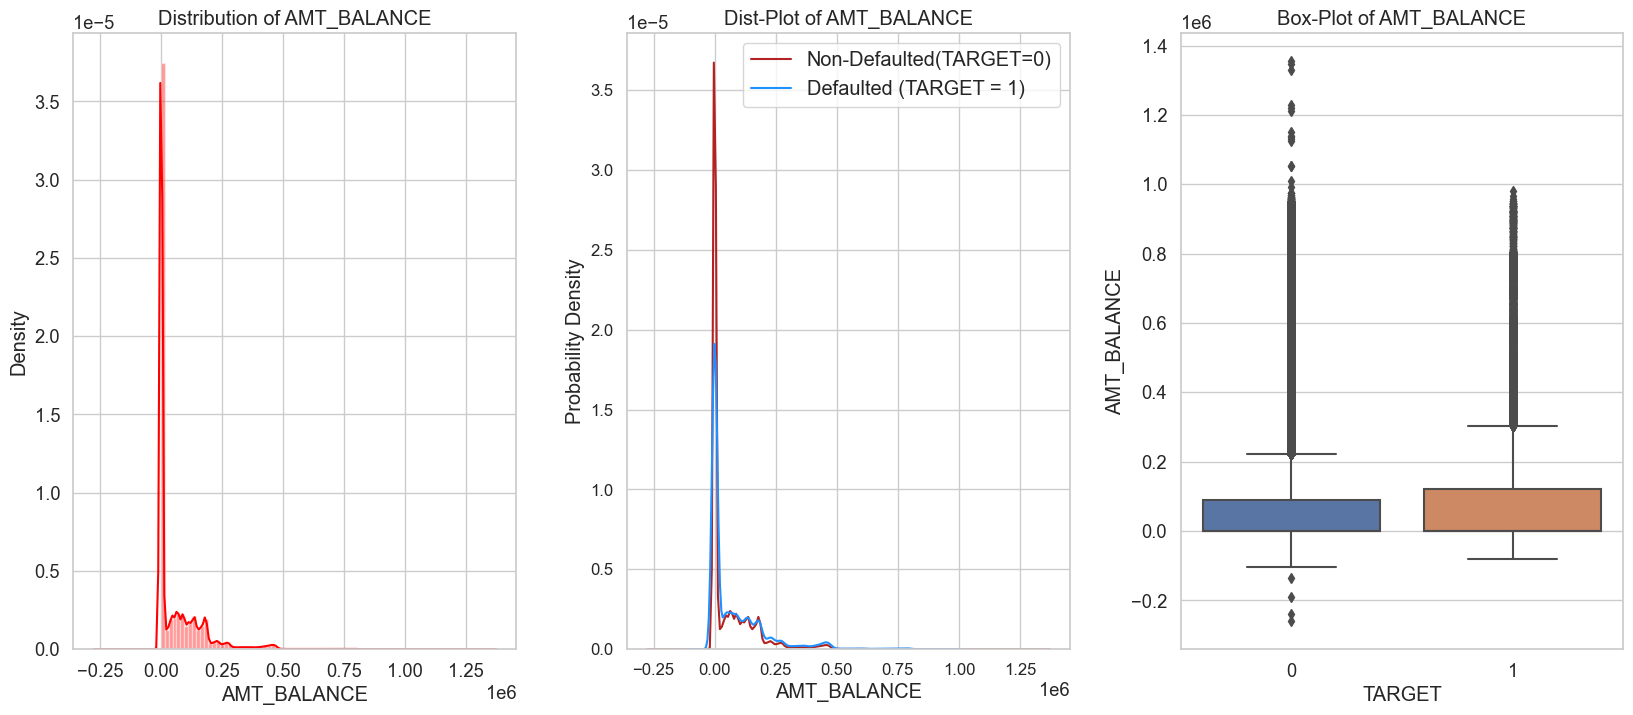

In [9]:
plot_numerical_variables(credit_card_merged, 'AMT_BALANCE')

##### AMT_BALANCE
- Phân phối của nhóm khách hàng có nợ xấu (Target=1) có xu hướng tập trung xung quanh giá trị trung bình hơn, trong khi đó thì phân phối của nhóm khách hàng không có nợ xấu (Target=0) có xu hướng dàn trải hơn và có nhiều outliers hơn

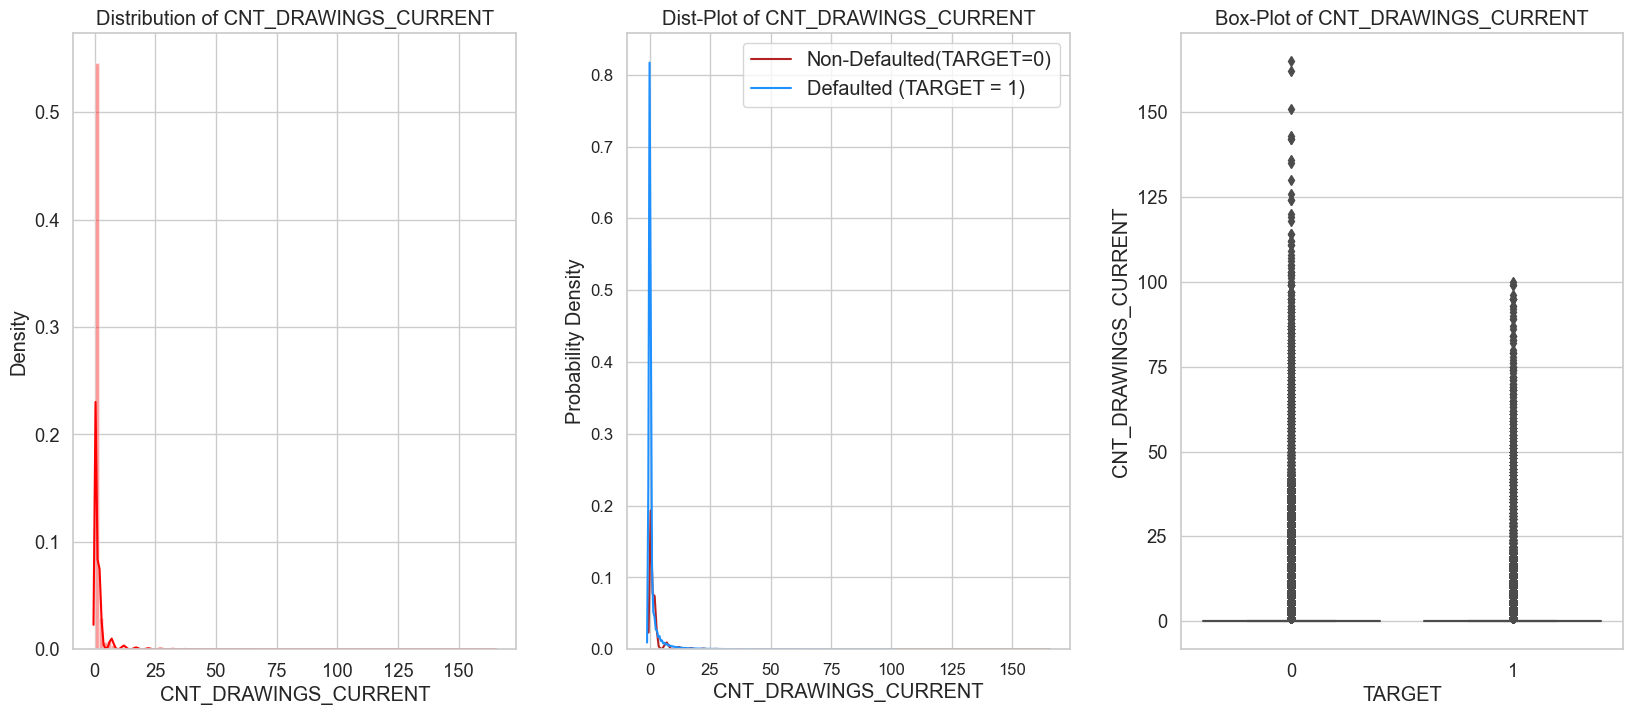

In [10]:
plot_numerical_variables(credit_card_merged, 'CNT_DRAWINGS_CURRENT')

##### CNT_DRAWINGS_CURRENT
- Nhìn chung phân phối của feature này khá tương đồng với 'AMT_BALANCE'

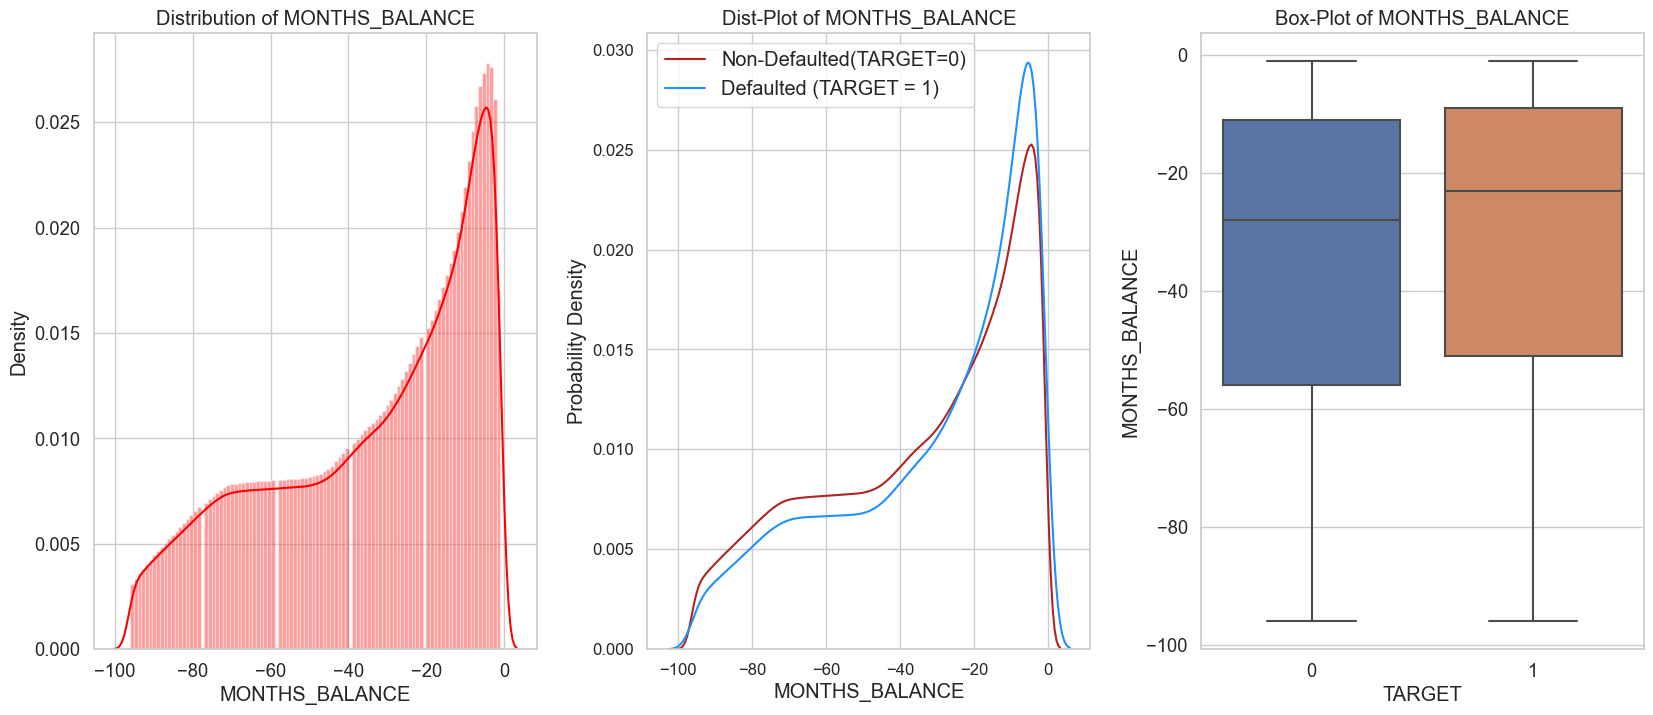

In [11]:
plot_numerical_variables(credit_card_merged, 'MONTHS_BALANCE')

##### MONTHS_BALANCE
- Đây là một feature có dạng time series, khi Feature Engineering, chúng ta có thể sort dữ liệu theo biến này để sử dụng một số kĩ thuật FE: EWM,..
- Dữ liệu tập trung nhiều trong khoảng từ 0 đến khoảng 20 (tháng) -> chúng ta có thể groupby theo 1 đến 2 năm gần nhất để nói rõ hơn về các hành vi của khách hàng.

### NEW FEATURES

Từ heatmap, ta có thể thấy khá nhiều features có mức độ tương quan lẫn nhau lớn. Từ đó, đề xuất 1 số features mới như sau:

##### AMT_DRAWING_SUM
Tổng số tiền được rút của các loại tiền khác nhau trong một tháng tín dụng.

In [12]:
credit_card_merged['AMT_DRAWING_SUM'] = credit_card_merged['AMT_DRAWINGS_ATM_CURRENT'] + credit_card_merged['AMT_DRAWINGS_CURRENT'] + credit_card_merged[    'AMT_DRAWINGS_OTHER_CURRENT'] + credit_card_merged['AMT_DRAWINGS_POS_CURRENT']

##### BALANCE_LIMIT_RATIO
Tỷ lệ số dư và hạn mức thẻ tín dụng. Giá trị này cho biết chỉ số về tỷ lệ sử dụng tín dụng.

In [13]:
credit_card_merged['BALANCE_LIMIT_RATIO'] = credit_card_merged['AMT_BALANCE'] / (credit_card_merged['AMT_CREDIT_LIMIT_ACTUAL'] + 0.00001)

##### CNT_DRAWING_SUM
Tổng số lần rút các loại tiền khác nhau trong một tháng tín dụng.

In [14]:
credit_card_merged['CNT_DRAWING_SUM'] = credit_card_merged['CNT_DRAWINGS_ATM_CURRENT'] + credit_card_merged['CNT_DRAWINGS_CURRENT'] + credit_card_merged['CNT_DRAWINGS_OTHER_CURRENT'] + credit_card_merged['CNT_DRAWINGS_POS_CURRENT'] + credit_card_merged['CNT_INSTALMENT_MATURE_CUM']

##### MIN_PAYMENT_RATIO
Tỷ lệ của khoản thanh toán hiện tại với số tiền trả góp tối thiểu.

In [15]:
credit_card_merged['MIN_PAYMENT_RATIO'] = credit_card_merged['AMT_PAYMENT_CURRENT'] / (credit_card_merged['AMT_INST_MIN_REGULARITY'] + 0.0001)

##### PAYMENT_MIN_DIFF
Chênh lệch giữa khoản thanh toán hiện tại và số tiền trả góp tối thiểu.

In [16]:
credit_card_merged['PAYMENT_MIN_DIFF'] = credit_card_merged['AMT_PAYMENT_CURRENT'] - credit_card_merged['AMT_INST_MIN_REGULARITY']

##### MIN_PAYMENT_TOTAL_RATIO
Tỷ lệ giữa tổng số tiền thanh toán hiện tại và số tiền trả góp tối thiểu.

In [17]:
credit_card_merged['MIN_PAYMENT_TOTAL_RATIO'] = credit_card_merged['AMT_PAYMENT_TOTAL_CURRENT'] / (credit_card_merged['AMT_INST_MIN_REGULARITY'] +0.00001)

##### AMT_INTEREST_RECEIVABLE
Chênh lệch giữa tổng số tiền phải thu và số tiền gốc phải thu. Giá trị này cho biết số tiền lãi phải thu.

In [18]:
credit_card_merged['AMT_INTEREST_RECEIVABLE'] = credit_card_merged['AMT_TOTAL_RECEIVABLE'] - credit_card_merged['AMT_RECEIVABLE_PRINCIPAL']

##### SK_DPD_RATIO
Tỷ lệ số ngày quá hạn và số ngày quá hạn được cho phép. Giá trị này cho biết thông tin chi tiết về các khoản thanh toán trễ liên quan đến số ngày quá hạn được chấp nhận.

In [19]:
credit_card_merged['SK_DPD_RATIO'] = credit_card_merged['SK_DPD'] / (credit_card_merged['SK_DPD_DEF'] + 0.00001)